In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y.astype(int) - 1


In [3]:
loo = LeaveOneOut()
loo_scores = [] 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

le = LabelEncoder()

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

y_train_encoded = le.fit_transform(y_train)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train_encoded)

y_pred_encoded = xgb_classifier.predict(X_test)

y_pred = le.inverse_transform(y_pred_encoded)
loo_scores.append(y_pred[0] == y_test[0])

precision = precision_score(y, xgb_classifier.predict(X), average='micro')
recall = recall_score(y, xgb_classifier.predict(X), average='micro')
f1 = f1_score(y, xgb_classifier.predict(X), average='micro')
print("Precision (Micro) =", precision)
print("Recall (Micro) =", recall)
print("F1-score (Micro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, xgb_classifier.predict(X))
print("Confusion Matrix:")
print(conf_matrix)

print("*******************")
class_report = classification_report(y, xgb_classifier.predict(X))
print("Classification Report:")
print(class_report)




Precision (Micro) = 0.9985888993414863
Recall (Micro) = 0.9985888993414863
F1-score (Micro) = 0.9985888993414863
*******************
Confusion Matrix:
[[1653    2    0]
 [   1  294    0]
 [   0    0  176]]
*******************
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1655
           1       0.99      1.00      0.99       295
           2       1.00      1.00      1.00       176

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126



In [5]:
# data set had negative value, using log transform to make positive and Adding 1 in X, to prevent log value as infinite
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_log_transformed = np.log1p(X + 1)

kbest = SelectKBest(score_func=chi2, k=5)
X_new = kbest.fit_transform(X_log_transformed, y)

feature_scores = kbest.scores_
print("Feature Importance Scores:")
print(feature_scores)

Feature Importance Scores:
[2.61919200e-01 1.77368755e-03 1.52940324e-02 5.36050691e-04
 3.95730127e-04 6.56463269e-08 8.59609816e-05 1.68957195e+01
 1.45339333e+01 5.29494011e+02 4.23579355e+01 1.72531418e+01
 3.22287127e+00 1.27957858e-02 5.13797999e+00 5.46795895e-01
 1.72059243e+00 1.58334943e+00 1.05026330e+00 1.21194002e+02
 1.18517227e+01]


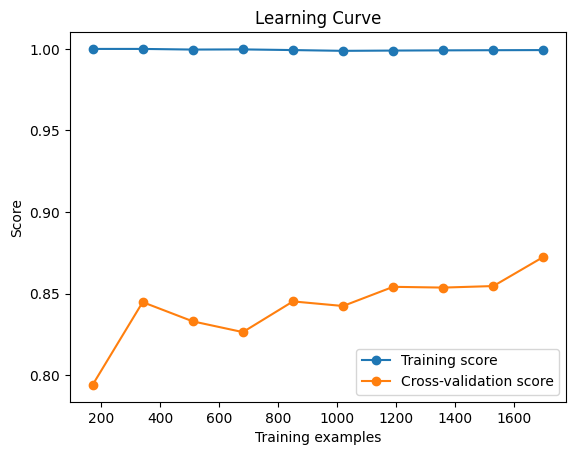

In [6]:
train_sizes, train_scores, test_scores = learning_curve(xgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()